<font size=7>LFP Animations

<font color="red">

**To Do**
* run filtes on data, see if graphs look different

# <font color="grey"> Imports

In [1]:
# Basic Imports
import numpy as np
import matplotlib.pyplot as plt

# Ash's animation imports
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
import scipy.interpolate
from matplotlib.widgets import RadioButtons, Slider, Cursor

# My imports
import pickle
from human_hip.basics import read_phy_files
import  braingeneers.data.datasets_electrophysiology as ephys

# <font color="purple"> Ash Code

## <font color="purple">2D Scatter

In [2]:



class AnimatedScatter2D(object):
    def __init__(self,data,x,y,zmin=-2000, zmax=0, frames=100):
        # self.fig = plt.figure()
        # self.ax = self.fig.add_subplot(111)

        self.fig, self.ax = plt.subplots(1,1)
        self.data = data
        self.x = x
        self.y = y
        self.cursor = Cursor(self.ax, useblit=True, color='red')
        # self.radio = RadioButtons(self.ax, ('hello','world'))

        # self.ax_slider = fig.add_axes([0.25, 0.1, 0.65, 0.03])
        # self.slider = Slider(
        #             ax=self.ax_slider,
        #             label="Frame",
        #             valmin=0,
        #             valmax=self.data.shape[1],
        #             valinit=0,
        #             orientation="horizontal"
        #         )

        

        self.title = self.ax.set_title('Amplitudes')
        
        self.zmin = zmin
        self.zmax = zmax
        print(zmin,zmax)
        # make colorbar
        self.norm = norm=plt.Normalize(vmin=self.zmin, vmax=self.zmax)
        self.fig.colorbar(cm.ScalarMappable(norm=self.norm, cmap=cm.coolwarm), ax=self.ax, shrink=0.5, aspect=5)
        self.cmapper = cm.ScalarMappable(cmap=cm.coolwarm, norm=plt.Normalize(vmin=self.zmin, vmax=self.zmax))
        self.ani = FuncAnimation(self.fig, self.update, frames=frames,interval=1000, 
                                          init_func=self.setup_plot, blit=False)
                        
        
        # self.setup_plot()
        # plt.show()
        

    def setup_plot(self):
        # self.scat = self.ax.scatter(self.x,self.y,self.data[:,0])#,c=[data[:,0]],cmap=cm.coolwarm, vmin=zmin, vmax=zmax)
        
        self.scat = self.ax.scatter(self.x, self.y, norm= self.norm, c=self.data[:,0], cmap=cm.coolwarm)#,
                    #    antialiased=False)
        
        # for i, txt in enumerate(range(self.data.shape[0])):
        #     self.ax.annotate(txt, (self.x[i], self.y[i]))

        return self.scat
        

        # self.ax.set_xlabel('test')
        

    def update(self,i):
        
        # self.ax.clear()
        # colors = self.cmapper.to_rgba(self.data[:,i])
        # ax.scatter(x, y, data[:,0],c=data[:,0], cmap=cm.coolwarm, vmin=zmin, vmax=zmax)
        # self.scat._offsets3d = (self.x,self.y,self.data[:,i])
        # self.scat._facecolors = colors
        # collections = self.scat.coll
        # self.scat.set_facecolor(colors)
        self.scat.set_array(self.data[:,i])
        self.ax.set_title(f"{i/20:0.2f}ms")



    def save(self, filename):
        '''Saves file'''
        self.ani.save(filename)



# a = AnimatedTriSurf3D(zmin=-15, zmax = 15)
# plt.show()

## <font color="purple"> 3D Animation

In [3]:


# class AnimatedTriSurf3D(object):
#     def __init__(self,data,x,y,zmin=-2000, zmax=0, frames=100, fps = 20,elev=-30,azim=-90):
#         self.fig = plt.figure()
#         self.data = data
#         self.x = x
#         self.y = y

#         self.elev = elev
#         self.azim = azim

#         self.ax = self.fig.add_subplot(111, projection='3d')

#         self.title = self.ax.set_title('Amplitudes')
#         self.fps = fps
        
#         self.zmin = zmin
#         self.zmax = zmax
#         print(zmin,zmax)
#         # make colorbar
#         self.norm = norm=plt.Normalize(vmin=self.zmin, vmax=self.zmax)
#         self.cbar = self.fig.colorbar(cm.ScalarMappable(norm=self.norm, cmap=cm.coolwarm), ax=self.ax, shrink=0.5, aspect=5)
#         self.cbar.set_label('Amplitude (uV)')
#         self.cmapper = cm.ScalarMappable(cmap=cm.coolwarm, norm=plt.Normalize(vmin=self.zmin, vmax=self.zmax))
#         self.ani = FuncAnimation(self.fig, self.update, frames=frames,interval=1, 
#                                           init_func=self.setup_plot, blit=False)
                        
        
#         # self.setup_plot()
#         # plt.show()
        

#     def setup_plot(self):
#         # self.scat = self.ax.scatter(self.x,self.y,self.data[:,0])#,c=[data[:,0]],cmap=cm.coolwarm, vmin=zmin, vmax=zmax)
        
#         self.surf = self.ax.plot_trisurf(self.x, self.y, self.data[:,0], cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)
#         self.ax.set_zlim(self.zmin, self.zmax)
#         self.ax.zaxis.set_major_formatter('{x:.02f}')
#         # Set roll, azimuth
#         # self.ax.view_init(elev=-90,azim = -90)
#         self.ax.view_init(elev=self.elev,azim = self.azim)
        

#         # self.ax.set_xlabel('test')
        

#     def update(self,i):
        
#         self.ax.clear()
#         colors = self.cmapper.to_rgba(self.data[:,i])
#         # ax.scatter(x, y, data[:,0],c=data[:,0], cmap=cm.coolwarm, vmin=zmin, vmax=zmax)
#         # self.scat._offsets3d = (self.x,self.y,self.data[:,i])
#         # self.scat._facecolors = colors
#         self.surf = self.ax.plot_trisurf(self.x, self.y, self.data[:,i], cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False, norm = self.norm, edgecolor = 'black')

#         self.ax.set_zlim(self.zmin, self.zmax)
#         self.ax.set_title(f"{i/20:0.2f}ms")
#         self.ax.set_xlabel('um')
#         self.ax.set_ylabel('um')

#     def save(self, filename):
#         '''Saves file'''
#         self.ani.save(filename, fps = self.fps)






## <font color="grey">Rewrite Ash's Code

In [ ]:
# class AnimatedScatter2D(object):
#     def __init__(self,data,x,y,zmin=-2000, zmax=0, frames=100):
#         self.fig, self.ax = plt.subplots(1,1)
#         self.data = data
#         self.x = x
#         self.y = y
#         self.cursor = Cursor(self.ax, useblit=True, color='red')
#         self.title = self.ax.set_title('Amplitudes')
        
#         self.zmin = zmin
#         self.zmax = zmax
#         print(zmin,zmax)
#         # make colorbar
#         self.norm = norm=plt.Normalize(vmin=self.zmin, vmax=self.zmax)
#         self.fig.colorbar(cm.ScalarMappable(norm=self.norm, cmap=cm.coolwarm), ax=self.ax, shrink=0.5, aspect=5)
#         self.cmapper = cm.ScalarMappable(cmap=cm.coolwarm, norm=plt.Normalize(vmin=self.zmin, vmax=self.zmax))
#         self.ani = FuncAnimation(self.fig, self.update, frames=frames,interval=1, 
#                                           init_func=self.setup_plot, blit=False)
        

#     def setup_plot(self):
#         self.scat = self.ax.scatter(self.x, self.y, norm= self.norm, c=self.data[:,0], cmap=cm.coolwarm)#,
#         return self.scat

        

#     def update(self,i):
#         self.scat.set_array(self.data[:,i])
#         self.ax.set_title(f"{i/20:0.2f}ms")


#     def save(self, filename):
#         '''Saves file'''
#         self.ani.save(filename)


# <font color="orange"> Prepare Data

## <font color="orange"> Load Data

In [3]:
# load raw data
file = open('/workspaces/human_hippocampus/data/ephys_raw/2022-11-02-e-Hc11.1-chip16753/D_start5s_stop15s_fs1ms.pkl', 'rb')
data_pkl = pickle.load(file)
file.close()

plot electrode layout

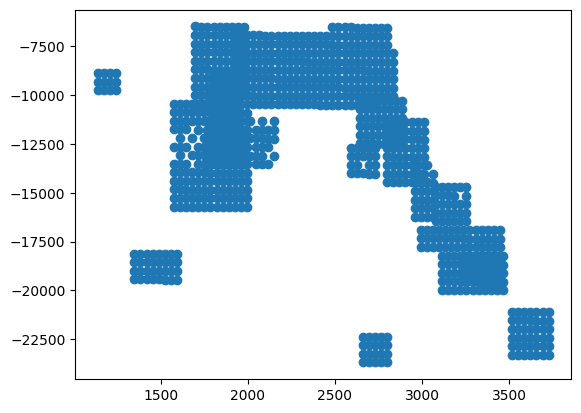

In [10]:
# plot electrode layout
plt.scatter( data_pkl["xy"][:,1] , data_pkl["xy"][:,0]*-1 )

## <font color="orange">Proccess Data 

In [11]:
# Get raw data from pkl file
data_raw = data_pkl["data"]



In [13]:
data_raw.shape

(995, 10000)

# <font color="magenta">Bicucculine Animation

## <font color="magenta"> Create animation

In [67]:
np.min(used_data)

252.83913

In [68]:
np.max(used_data)

726.261

253 727


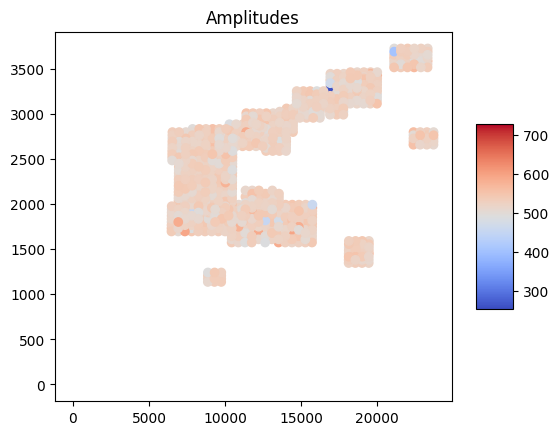

In [85]:
my_anime = AnimatedScatter2D( used_data, x, y, zmin=253, zmax=727, frames=20)

In [81]:
my_anime.save('checkit.mp4')

<font color="brown"> Tried making video in browser

In [78]:
from IPython.display import HTML

In [79]:
HTML( my_anime.ani.to_html5_video() )

## <font color="brown"> Create multiple scatter plots

In [83]:
norm = plt.Normalize( vmin=253, vmax=727)

In [90]:
# create a range from 0 to 100 that an interval of 10
#np.arange(0, 100, 10)
for i in range(0, 100, 10):
    print(i)

0
10
20
30
40
50
60
70
80
90


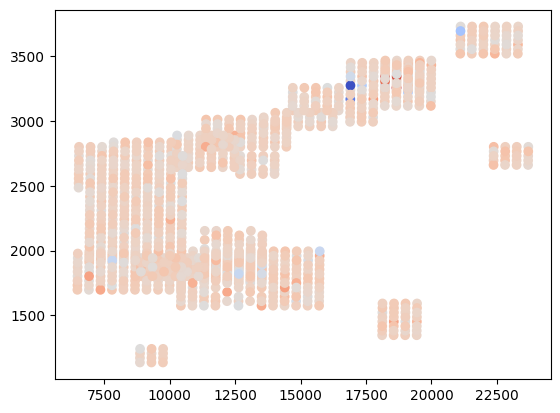

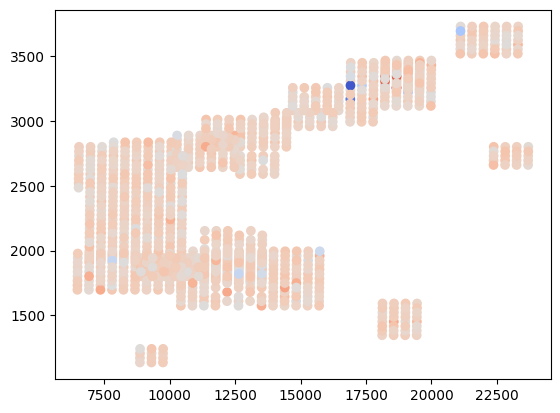

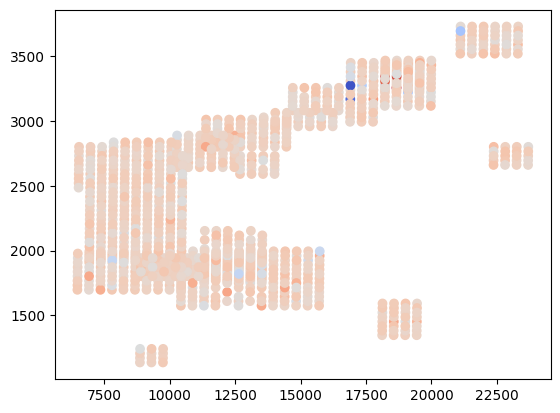

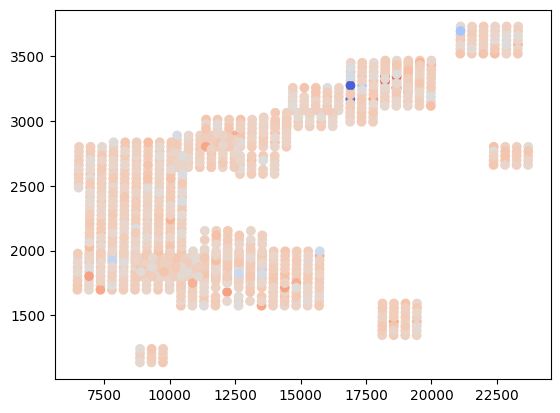

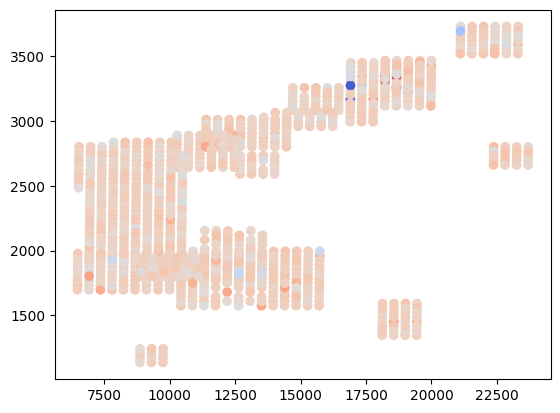

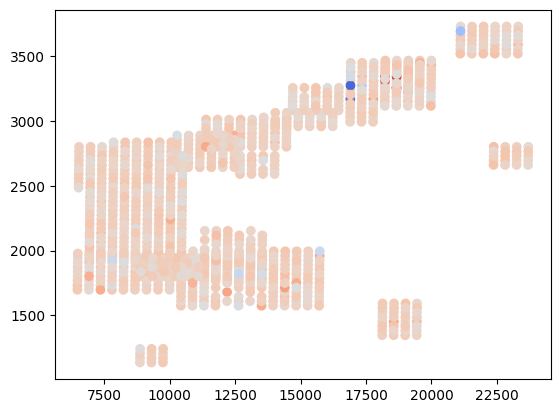

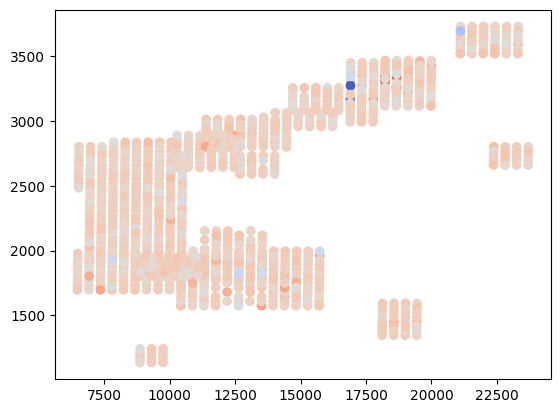

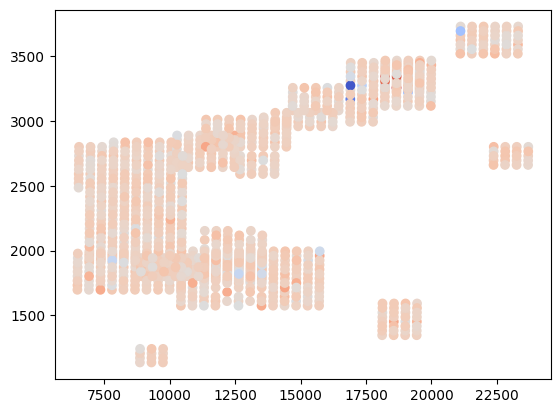

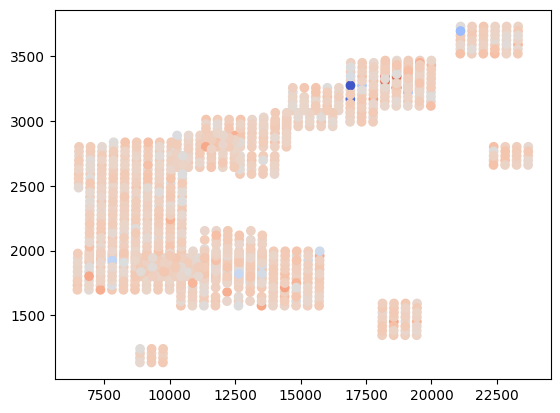

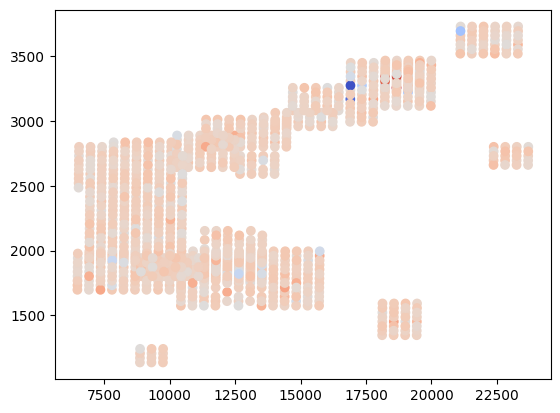

In [95]:
for i in range(0, 10000, 1000):
    #plt.figure(figsize=(20,4))
    plt.scatter( x, y, norm=norm, c= used_data[:,i], cmap=cm.coolwarm)
    plt.show()


In [93]:
used_data[:,0]

array([537.6453 , 542.6195 , 517.04755, 532.0225 , 523.98395, 514.9394 ,
       501.14655, 518.9344 , 514.05365, 545.8253 , 528.9107 , 550.4314 ,
       529.07574, 514.94434, 515.0017 , 510.04654, 530.8466 , 529.60144,
       504.9892 , 506.04767, 526.9356 , 500.30847, 537.875  , 541.7371 ,
       531.83386, 491.22812, 537.6759 , 702.73315, 515.9295 , 528.7448 ,
       516.979  , 528.06885, 521.8461 , 531.8648 , 539.69806, 524.92267,
       525.90955, 533.8039 , 533.735  , 528.9682 , 525.9046 , 513.0267 ,
       525.9506 , 718.65656, 536.65027, 518.9383 , 534.75525, 518.0159 ,
       513.9864 , 538.8153 , 538.6997 , 517.11035, 523.82446, 520.0195 ,
       523.77466, 518.9762 , 512.9953 , 539.8447 , 527.9542 , 422.2931 ,
       515.9982 , 506.2005 , 537.67755, 504.20172, 513.1747 , 516.9669 ,
       510.26685, 526.1642 , 522.0158 , 515.1389 , 518.18384, 534.80884,
       506.1896 , 536.84796, 510.08847, 305.7595 , 505.11353, 530.9943 ,
       511.9857 , 518.78766, 527.8019 , 537.6324 , 

In [94]:
used_data[:,1000]

array([539.9621 , 540.62616, 516.2101 , 538.29767, 520.30304, 509.87326,
       502.2826 , 517.4226 , 513.9717 , 547.3427 , 532.3946 , 551.3705 ,
       532.91895, 519.1789 , 516.3346 , 515.20447, 524.3795 , 522.64124,
       500.0129 , 509.1183 , 528.7654 , 503.09048, 536.4219 , 548.7311 ,
       530.4934 , 491.2111 , 537.56085, 691.76605, 516.49475, 530.7254 ,
       520.019  , 533.2107 , 525.89996, 526.3871 , 536.58545, 520.9218 ,
       526.90845, 531.76776, 527.26764, 522.44714, 522.33234, 510.09894,
       527.6397 , 734.99255, 536.45703, 520.0032 , 529.9595 , 524.15344,
       517.30566, 535.4386 , 541.3931 , 524.2911 , 525.5646 , 525.2159 ,
       528.2581 , 521.8448 , 508.0368 , 537.4443 , 523.0818 , 424.93668,
       515.78107, 509.716  , 537.855  , 505.90024, 512.8699 , 511.53723,
       510.93887, 525.1579 , 527.8511 , 509.303  , 524.2778 , 529.6626 ,
       505.74457, 545.49963, 507.72763, 302.8921 , 502.3941 , 532.3709 ,
       514.1981 , 520.55835, 525.04724, 535.7002 , 